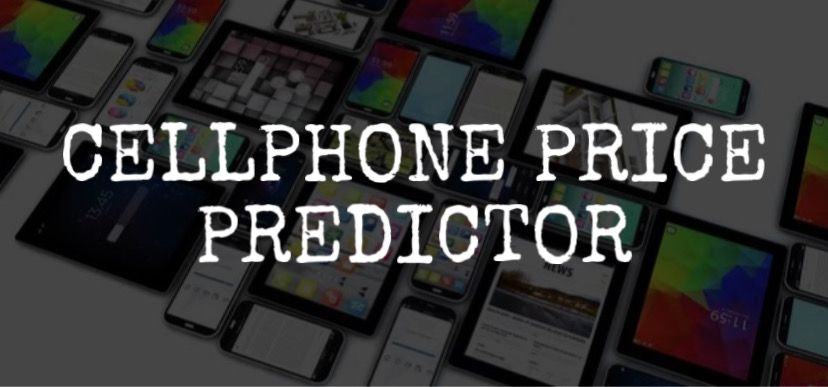

# **Cellphone Price Prediction**

# Problem Statement

### Task 1:-Prepare a complete data analysis report on the given data.

### Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

### Task 3:- Prepare the analysis report stating how the model will help expanding the business by stating several factors including feature importance.


# To predict the Price range of mobile  based on given feature

# Importing and Reading DataSet Given

In [1]:
# Importing  The necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data set given

data=pd.read_csv("datasets_11167_15520_train.csv")

# Basic Checks

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
#Insights:

#1.Maximum battery power of mobile will 1998 mAh & minimum will 501 mAh.
#2.Mobiles weight are in the range of 80-200 grams.
#3.There are some mobiles which have no bluetooth feature.
#4.We can talk maximum 20hrs with a single battery charge.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
#Insights:

#1.There are no null values present in our dataset. It will easy for preprocessing step.

In [9]:
data.shape

(2000, 21)

In [10]:
# We have 2000 samples and 21 attributes.
#The last attribute is a target attribute, which means that we have labeled data.

# Exploratory Data Analysis (EDA)

In [11]:
#Step 1 : Univariate Analysis
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


<Axes: xlabel='battery_power', ylabel='count'>

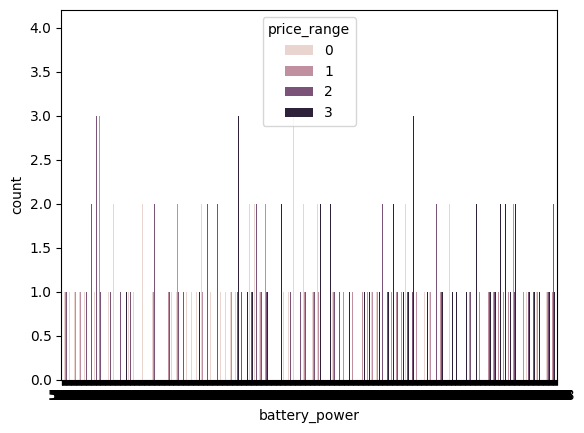

In [12]:
sns.countplot(x='battery_power',hue='price_range',data=data)

<Axes: xlabel='blue', ylabel='count'>

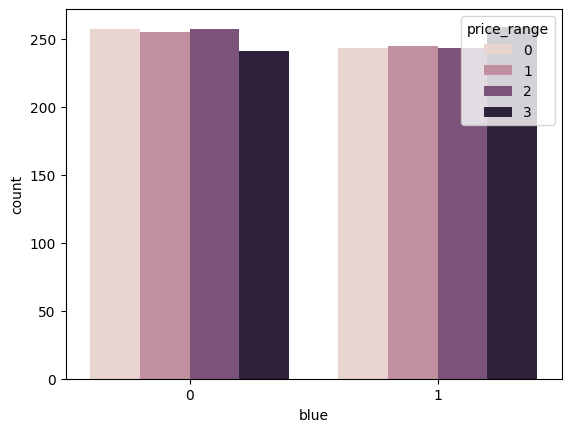

In [13]:
sns.countplot(x='blue',hue='price_range',data=data)

<Axes: xlabel='ram', ylabel='count'>

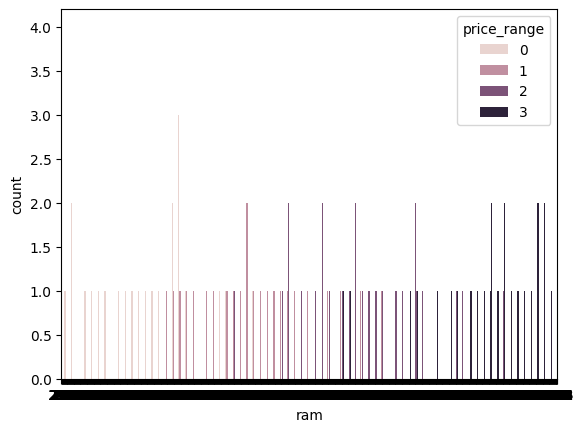

In [14]:
sns.countplot(x='ram',hue='price_range',data=data)

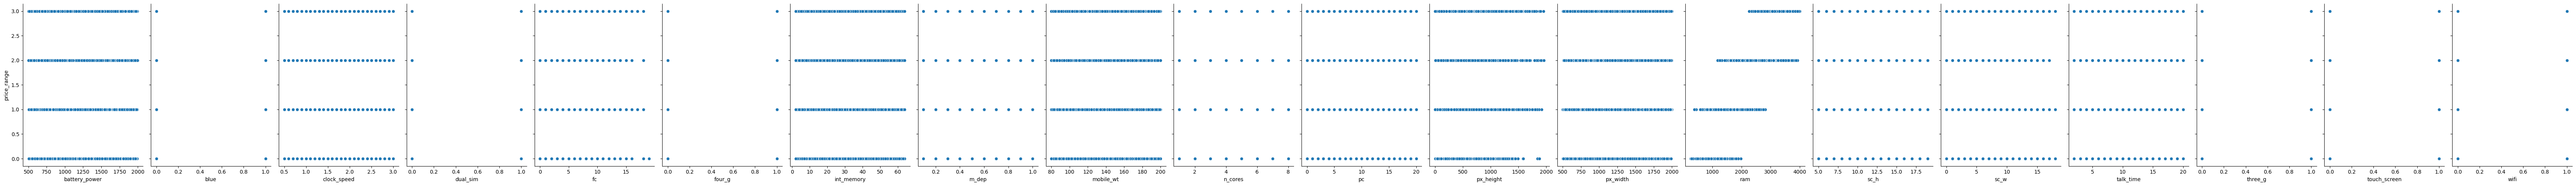

In [44]:
sns.pairplot(data, x_vars=data.columns[:-1], y_vars='price_range', height=5, aspect=0.7)
plt.show()

In [45]:
# Insight:

# We can clearly see that as the amount of RAM memory increases, the price also increases.

<Axes: >

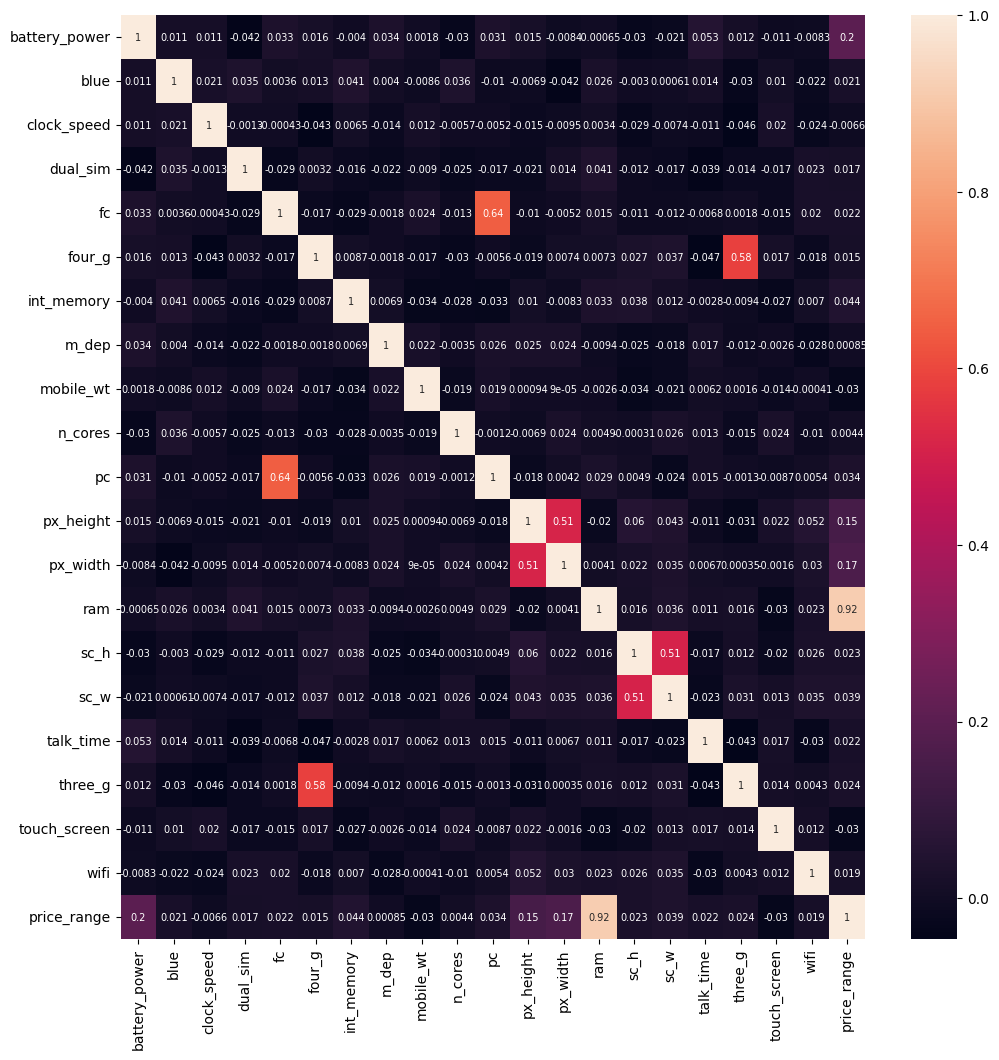

In [15]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(data.corr(),annot=True,annot_kws = {'size': 7})

In [16]:
# We see from the heatmap;

# 1.The most influential variable is ram
# 2.Most of the variables have very little correlation to price range
# 3.Primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect price range.
# 4.Having 3G and 4G is somewhat correlated
# 5.There is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

In [17]:
# As mentioned above, our data have labels and we will apply supervised learning algorithms.
# We define our target column as "y" and rest of the data which are used as inputs as "x".

In [18]:
y = data['price_range']
x = data.drop('price_range', axis = 1)

In [19]:
y.unique()
# We have four price ranges as target values and will do multi-class classification.

array([1, 2, 3, 0])

In [20]:
#Let's see our dataset is balanced or imbalanced?
y.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [21]:
# So,our dataset is balanced.

In [22]:
# We split our dataset into 'training' and 'testing' datasets.
# And, we are going to see our models' accuracy by applying them on testing dataset.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [23]:
print(x_train)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
968            1923     0          0.5         1   7       0          46   
240             633     1          2.2         0   0       1          49   
819            1236     0          0.9         1   2       1          57   
692             781     0          1.1         0   2       0          38   
420            1456     1          0.5         1   7       0           7   
...             ...   ...          ...       ...  ..     ...         ...   
1130           1975     1          1.9         1   2       0          31   
1294            589     1          0.5         0   1       1          59   
860            1829     1          0.5         0   0       1          15   
1459           1927     0          0.9         1   3       0          11   
1126            635     1          0.6         1   1       1          50   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
968     0

In [24]:
# Let's check whether the split works correctly
print(x_train.shape)
print(x_test.shape)

(1600, 20)
(400, 20)


In [25]:
print(y_train.shape)
print(y_test.shape)

(1600,)
(400,)


# Logistic Regression

In [26]:
#Target variables of the data set are discrete, hence, we are going to apply multiclass Logistic regression model.

from sklearn.linear_model import LogisticRegression
lr_multi = LogisticRegression(multi_class = 'multinomial',solver = 'sag',max_iter = 10000) # object creation
lr_multi.fit(x_train, y_train) # training
y_pred=lr_multi.predict(x_test)# prediction

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print (confusion_matrix)

[[86 19  0  0]
 [ 9 60 18  4]
 [ 0 19 52 21]
 [ 0  0 25 87]]


In [28]:
from sklearn.metrics import accuracy_score
acc_lr= accuracy_score(y_test,y_pred)
print(acc_lr)

0.7125


In [29]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       105
           1       0.61      0.66      0.63        91
           2       0.55      0.57      0.56        92
           3       0.78      0.78      0.78       112

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.72      0.71      0.72       400



# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8775


In [31]:
cr2 = classification_report(y_test, y_pred)
print(cr2)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.86      0.81      0.84        91
           2       0.77      0.85      0.81        92
           3       0.93      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



# K-Nearest Neighbors (KNN)

In [52]:
#'K' is the number of nearest training points which we classify them using the majority vote.
import numpy as np
np.random.seed(42)  # Setting random seed for reproducibility

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [53]:
y_predict_knn = model.predict(x_test.values)
print(y_predict_knn)

[0 2 1 3 1 2 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 0 2 0 1 2 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 3 2 1 1 3 1 3 1 0 0 1 1 1 2 0 0 1 3 3 1 0 0 3 3 2 2 2 3 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 2 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 2 2 3 3 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 3 0 2 2 0 0 0 1
 2 2 3 1 1 0 2 2 0 2 0 1 2 3 3 2 1 0 0 2 2 3 3 1 0 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 2 0 1 2 1 1 2 2 2 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 1
 3 0 0 2 1 2 0 0 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 2 2 2 2 2 0 2 3 2 2 2 1 0 2 0 2 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 2 0 2 1 1 1 0 0 1 3 2 3 1 0 1 0 1 3 2 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 2 1 1 3 1 0 0 3 3 0 3 0 0 2 0 0 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
accuracyKnn = accuracy_score(y_test.values, y_predict_knn)
print(accuracyKnn)

0.8775


In [55]:
cr_knn = classification_report(y_test.values, y_predict_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.86      0.81      0.84        91
           2       0.77      0.85      0.81        92
           3       0.93      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



# Decision Tree

In [37]:
# Decision tree is one of the most popular supervised learning algorithm that is mostly used in classification problems.

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=101)
dt_model = dt.fit(x_train, y_train)

In [38]:
y_pred_dt = dt.predict(x_test)

In [39]:
acc_dt=accuracy_score(y_test,y_pred_dt)
print(acc_dt)

0.8225


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred_dt)
print(confusion_matrix)

[[89 16  0  0]
 [10 76  5  0]
 [ 0 12 65 15]
 [ 0  0 13 99]]


In [41]:
from sklearn.metrics import classification_report
cr_dt=classification_report(y_test,y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       105
           1       0.73      0.84      0.78        91
           2       0.78      0.71      0.74        92
           3       0.87      0.88      0.88       112

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



In [46]:
# RandomForestClassifier is performing well compared to other models.
# BEST MODEL : Random Forest Classifier

# **Model Comparision Report**

**Overall Report:**
- The dataset contains 2000 samples with 21 attributes, with the last attribute being the target attribute, indicating labeled data.
- Insights from the data include:
  1. Maximum battery power of mobiles is 1998 mAh, and the minimum is 501 mAh.
  2. Mobiles weight ranges from 80 to 200 grams.
  3. Some mobiles do not have a Bluetooth feature.
  4. Maximum talk time with a single battery charge is 20 hours.
  5. There are no null values in the dataset, simplifying the preprocessing step.

**Model Comparison Report:**
- Univariate analysis showed that RAM memory has a clear positive correlation with price.
- Heatmap analysis revealed:
  1. RAM is the most influential variable.
  2. Most variables have little correlation with price range.
  3. Primary and front camera mega pixels are correlated but do not affect price range significantly.
  4. The presence of 3G and 4G is somewhat correlated.
  5. No highly correlated inputs, indicating no multicollinearity problem.
- The dataset's target variables are discrete, leading to a multiclass classification approach.
- Models applied:
  - Logistic Regression: Accuracy = 0.71
  - Random Forest Classifier: Accuracy = 0.88
  - KNN Model: Accuracy = 0.88
  - Decision Tree Model: Accuracy = 0.82

# **Report on Challenges Faced**

During the project, we encountered several challenges that impacted our analysis and modeling process:

1. Incorrect Model Selection: Initially, we mistakenly applied linear regression instead of logistic regression. This error occurred because we overlooked the fact that our target variable was comprised of discrete multi-class values. This led to inaccurate predictions and skewed our results.

2. Inconsistent KNN Model Accuracy: We also faced issues with the KNN model's accuracy. When rerunning the kernel or all cells, the KNN model consistently gave lower accuracy compared to the previous results. This inconsistency made it challenging to rely on the KNN model for accurate predictions.

Moving forward, we will be more vigilant in selecting appropriate models based on the data.

## **PTID-CDS-MAR-24-1870 Team Info:**

## 1. Dipanjali
* (01-MAY-23-CDS-ONL-BUN-021-WDE20)
* email:satyas.behera@gmail.com / dipanjalipatra@gmail.com

## 2. Vinay C
* (09-Oct-23-CDS-BUN-021-WDE20-ONL)
* email: vinayvinay9617@gmail.com

## 3. Sandeep Chandra Sagar R
* (09-Oct-23-CDS-BUN-021-WDE20-ONL)
* email: sanwithdeep@gmail.com



